<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Proyecto del curso - Clasificación de flechas de arquería</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg/598px-Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg.png" alt="Escudo UNAL" style="width:200px;height:250px;">

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ana Sofía Aponte Barriga<br>David Felipe Silva Chacón</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Técnicas de Inteligencia Artificial - Visión de Máquina</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Septiembre de 2022</p>

In [22]:
#!pip install opencv-python
#!pip install matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import math as m
import random
import os

In [3]:
def plot(pic,title='',color=False):
    if color:
        plt.imshow(pic)
    else:
        plt.imshow(pic,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [4]:
#img1 = cv2.imread('img/nossirve/nossirve.jpg',0)
#img = cv2.imread('img/nossirve/nossirve.jpg',1)
#plt.subplot(131),plot(img1,'B/W', 0)
#plt.subplot(132),plot(img1, 'BGR', 1)
#plt.subplot(133),plot(img, 'RGB')
#plt.show()

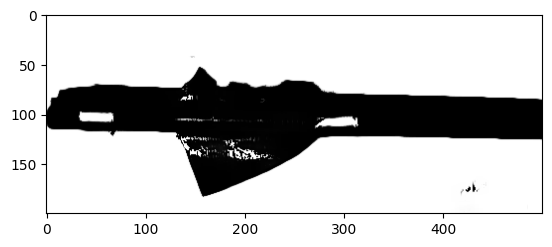

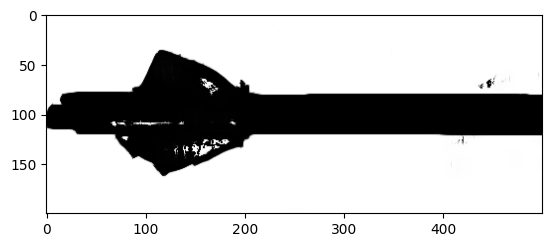

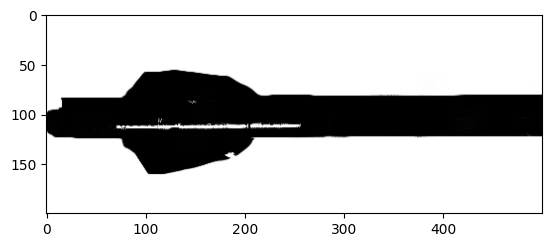

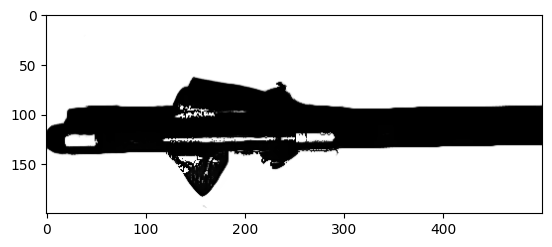

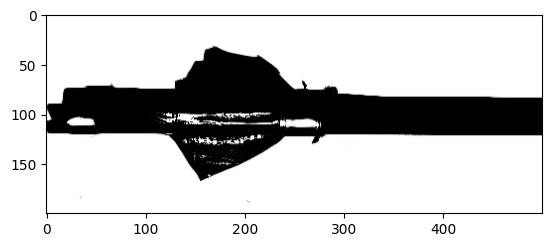

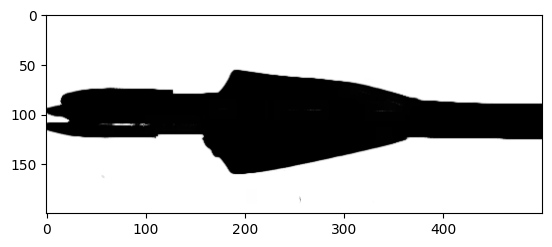

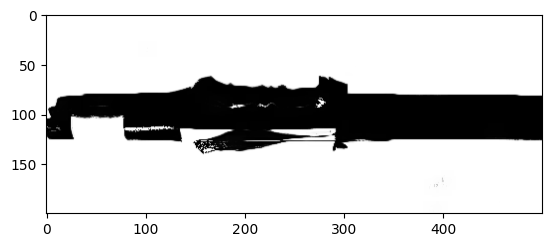

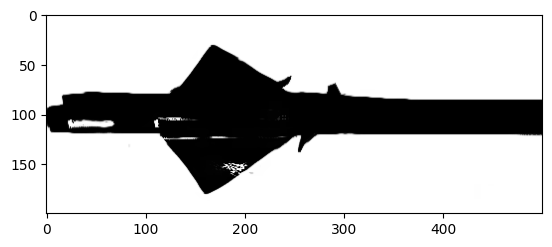

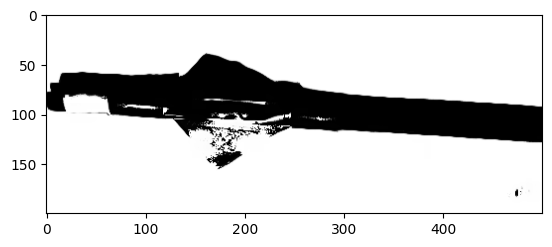

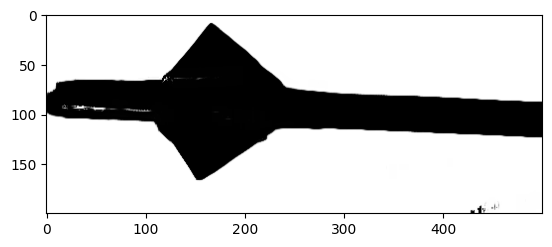

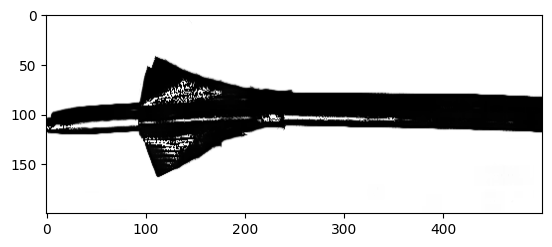

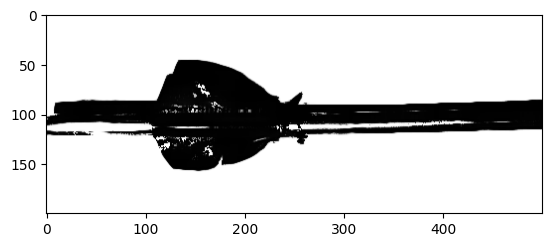

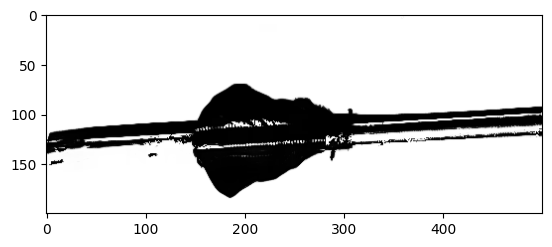

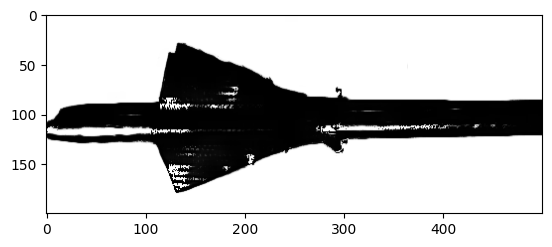

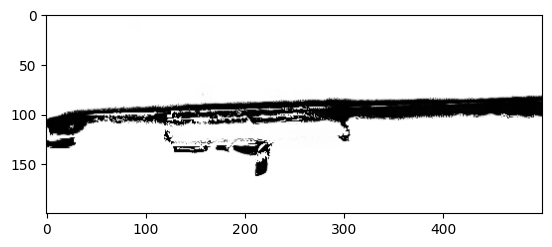

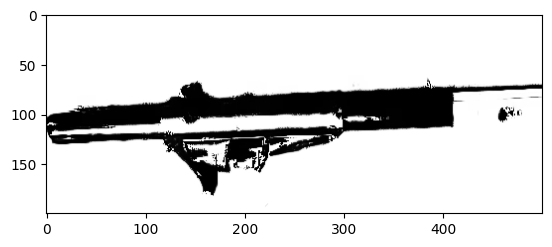

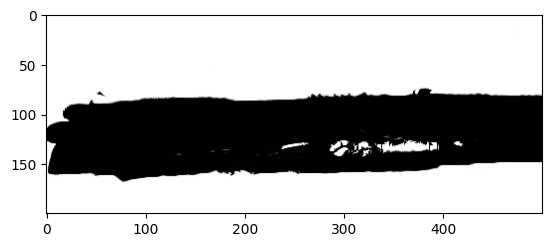

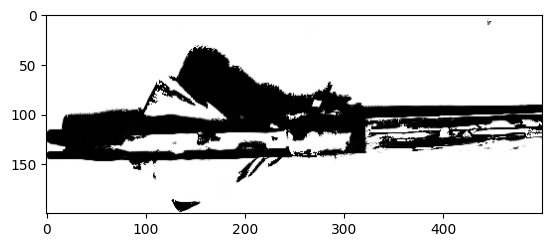

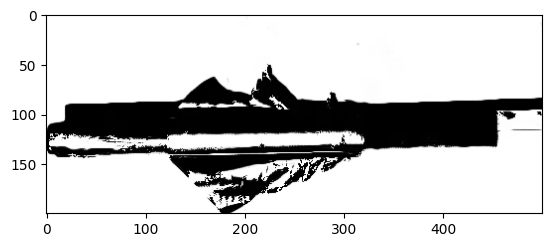

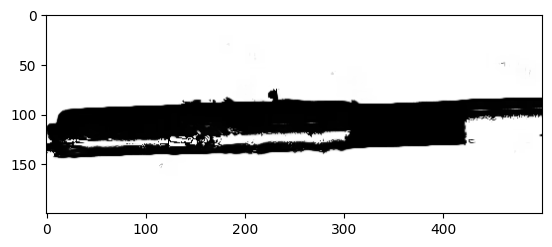

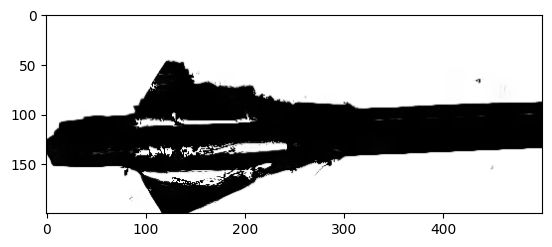

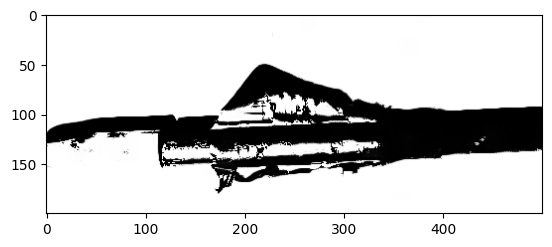

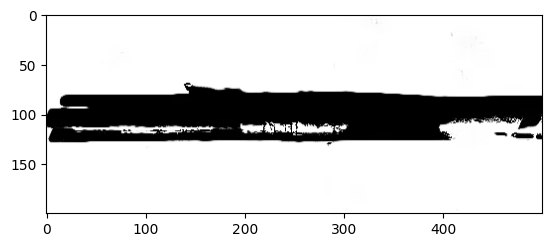

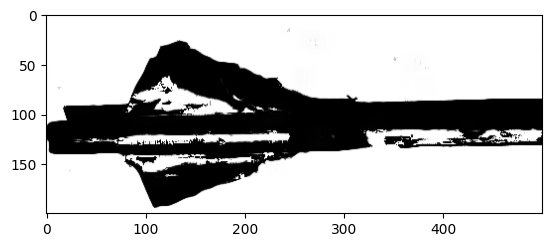

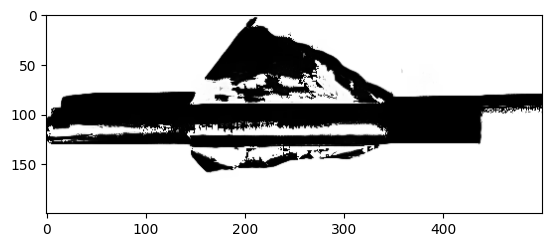

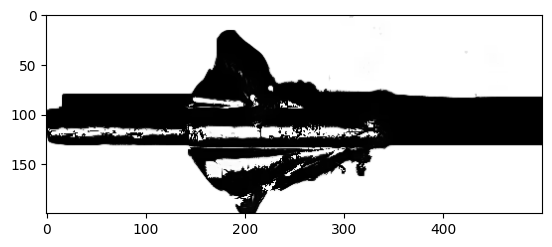

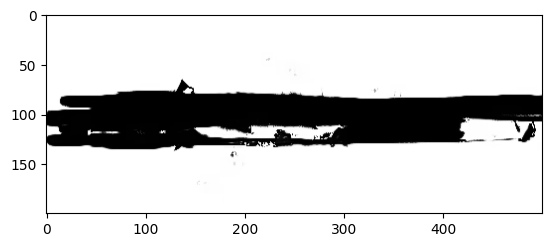

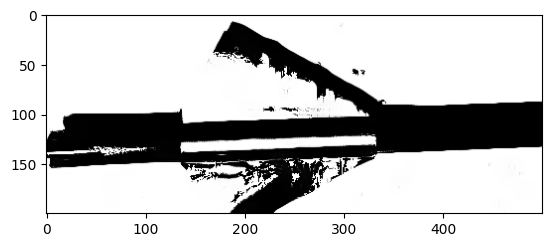

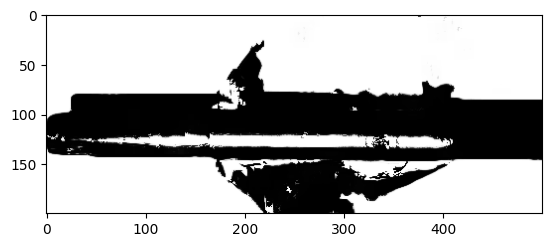

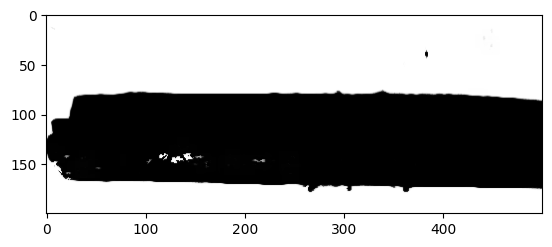

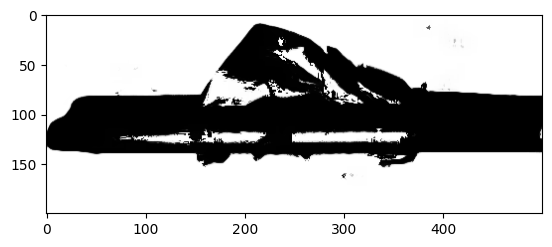

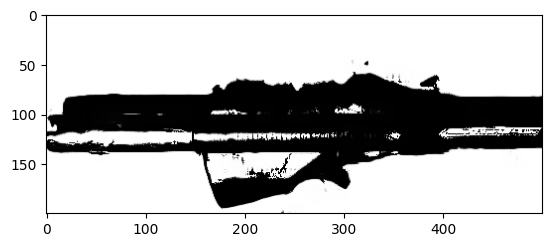

In [5]:
# carga y umbralizacion
picList = os.listdir('img2')
i = 0
imgList = []
for pic in picList:
    pic = "img2/" + pic
    img = cv2.imread(pic)
    img = cv2.resize(img, (1200, 900), interpolation= cv2.INTER_LINEAR)
    width = img.shape[1]
    height = img.shape[0]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshType, threshImg = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
    filteredImg = cv2.bilateralFilter(threshImg, 5, 80, 80)
    noiselessImg = cv2.fastNlMeansDenoising(filteredImg, None, 50, 7, 21)
    imgList.append(noiselessImg)
    x = 0
    y = 0
    yfin = 0
    colSuma = np.sum(imgList[i], 0)
    for j in range(len(colSuma)) :
        if colSuma[j] < 255*(height-10) :
            x = j
            break
    filSuma = np.sum(imgList[i], 1)
    for k in range(len(filSuma)) :
        if filSuma[k] < 255*(height-1) :
            y = k
            break
    for l in reversed(range(len(filSuma))) :
        if filSuma[l] < 255*(height-1) :
            yfin = l
            break
    if y < 100:
        roi = [x, 0, 500, 300]
    else:
        roi = [x, y-80, 500, 200]
    imgList[i] = imgList[i][int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
    plt.imshow(imgList[i], cmap = plt.cm.gray)
    plt.show()
    i = i+1

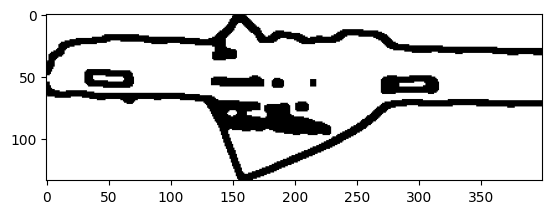

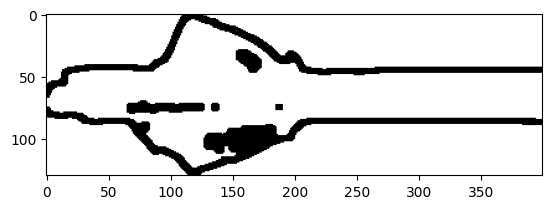

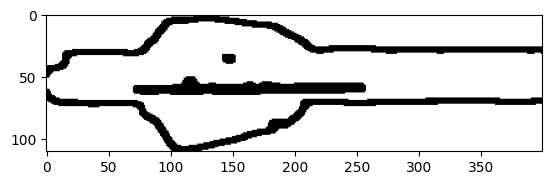

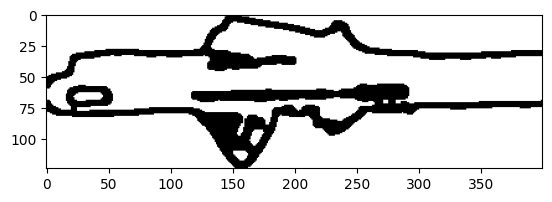

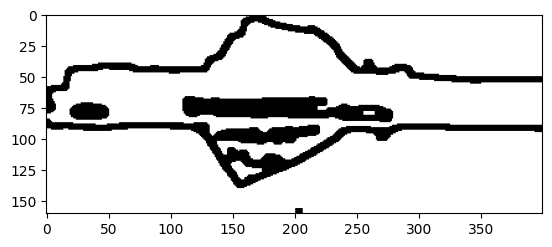

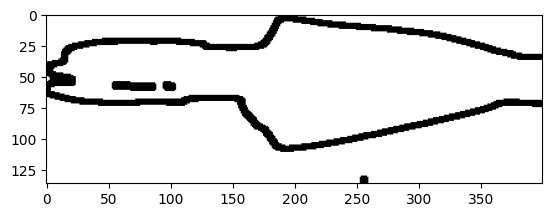

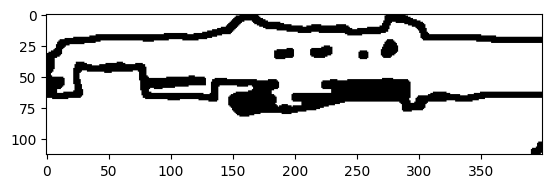

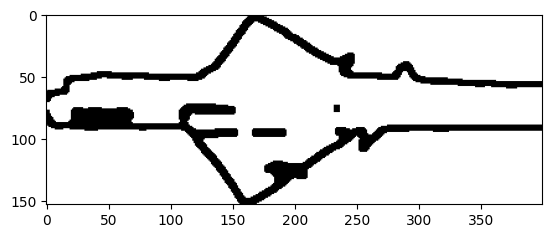

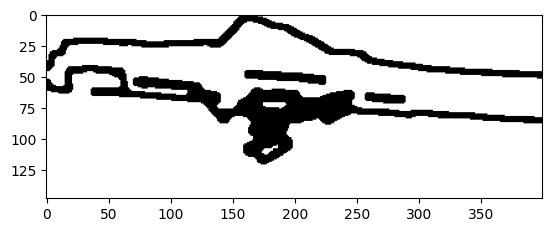

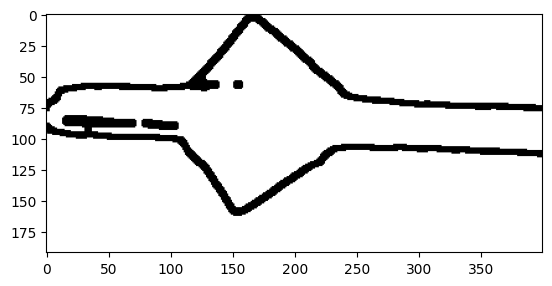

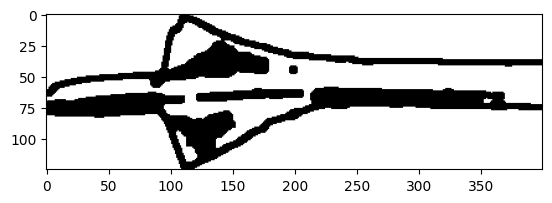

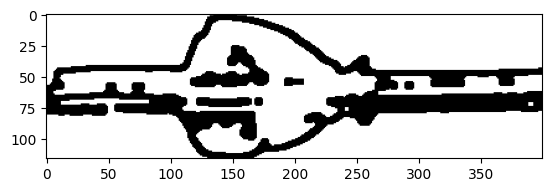

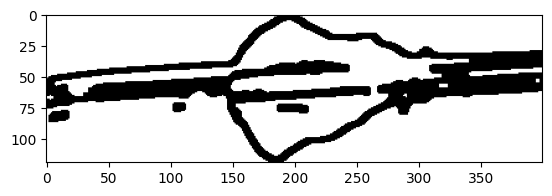

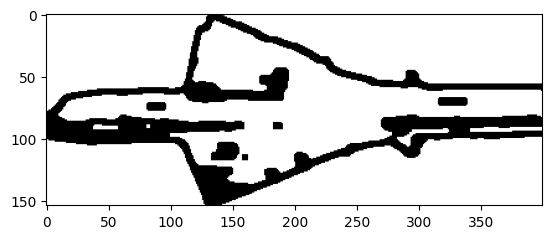

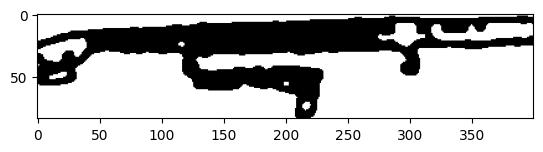

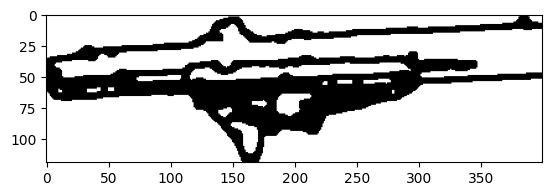

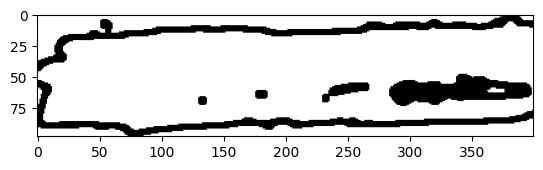

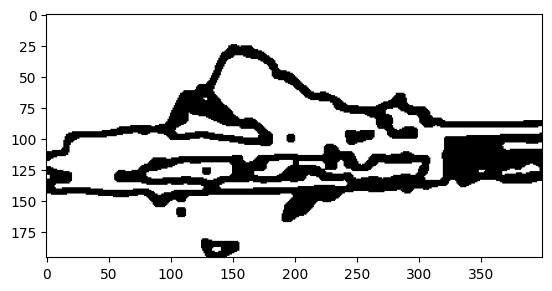

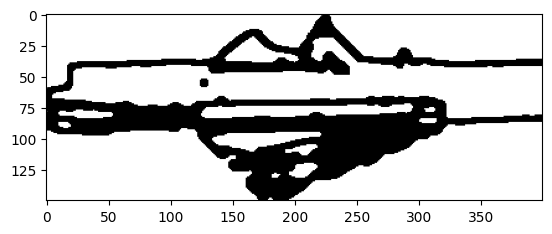

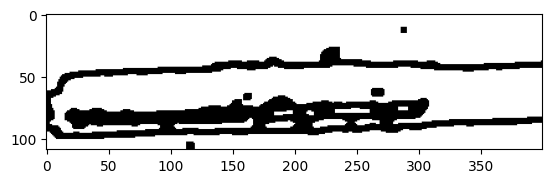

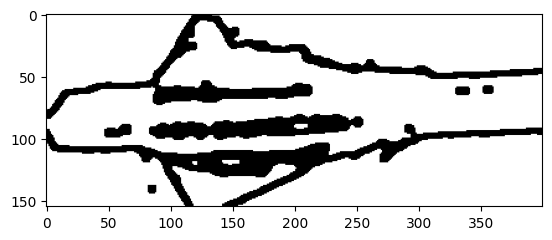

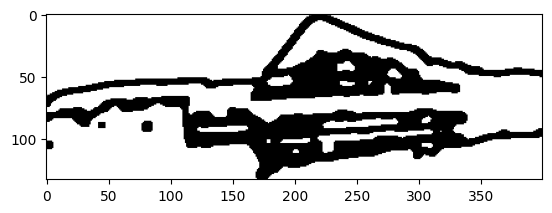

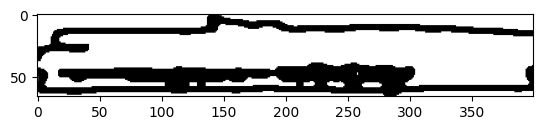

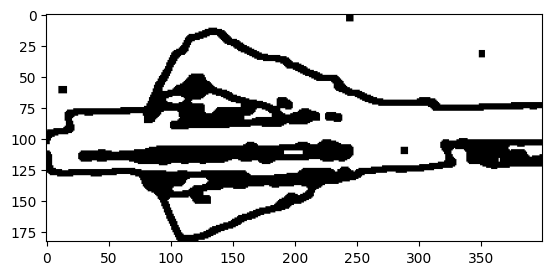

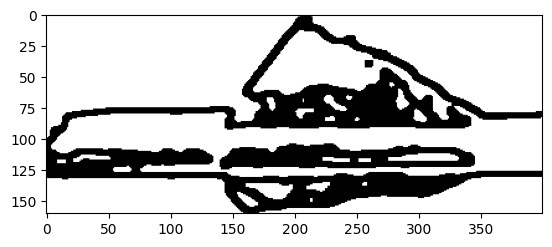

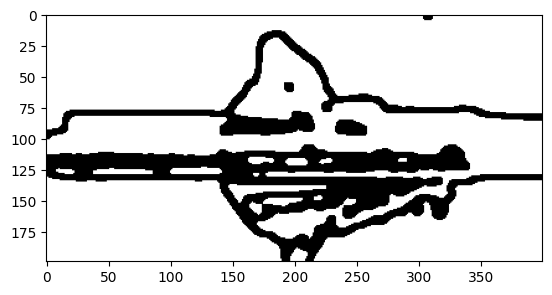

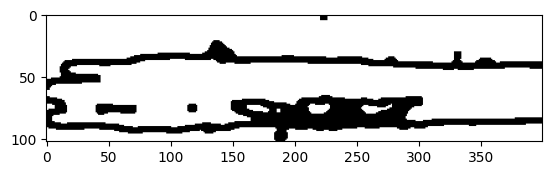

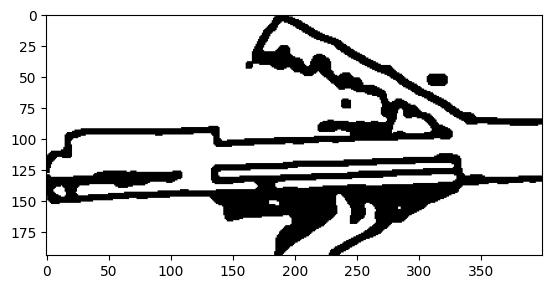

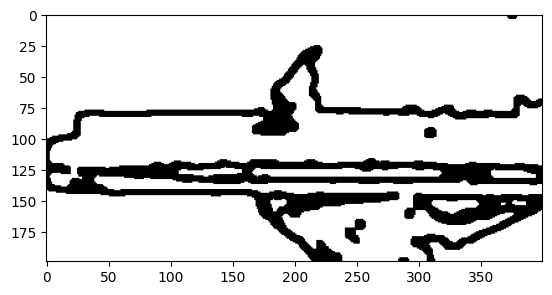

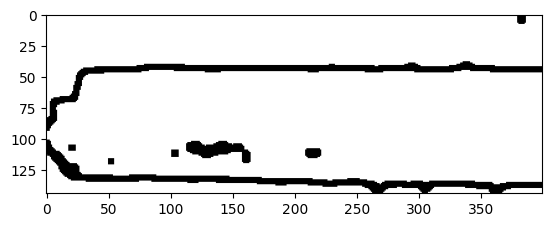

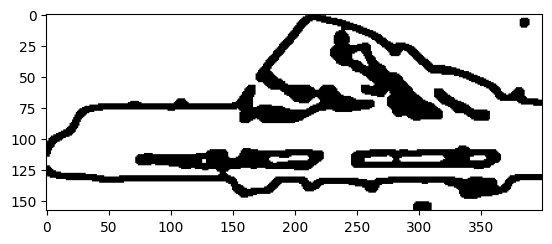

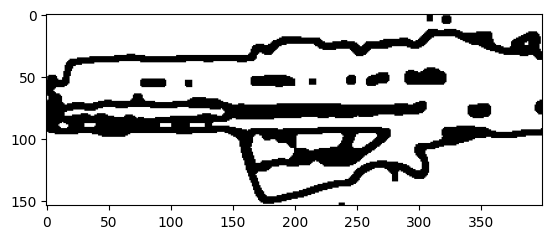

In [6]:
# deteccion de bordes
i = 0
edgeList = []
hList = []
for image in imgList:
    edge = cv2.Canny(image, 100,200)
    kernel = np.ones((5,5),np.uint8)
    edge = cv2.dilate(edge, kernel, iterations = 1)
    edge = cv2.medianBlur(edge, 5)
    edge = cv2.morphologyEx(edge, cv2.MORPH_OPEN, kernel)
    edgeList.append(cv2.bitwise_not(edge))
    width = edgeList[i].shape[1]
    height = edgeList[i].shape[0]
    x = 0
    y = 0
    colSuma = np.sum(edgeList[i], 0)
    for j in range(len(colSuma)) :
        if colSuma[j] < 255*(height-10) :
            x = j
            break
    filSuma = np.sum(edgeList[i], 1)
    for k in range(len(filSuma)) :
        for kk in range(width):
            if edgeList[i][k][kk] == 0 :
                y = k
                break
    for l in reversed(range(len(filSuma))) :
        for ll in range(width):
            if edgeList[i][l][ll] == 0 :
                yfin = l
                break
    roi = [x, yfin, 400, y-yfin]
    hList.append(y-yfin)
    edgeList[i] = edgeList[i][int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
    plt.imshow(edgeList[i], cmap = plt.cm.gray)
    plt.show()
    i = i+1

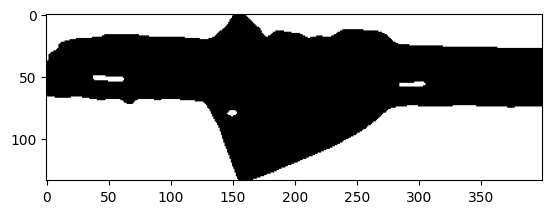

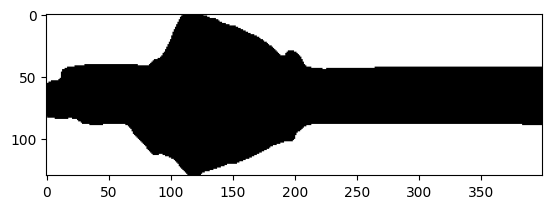

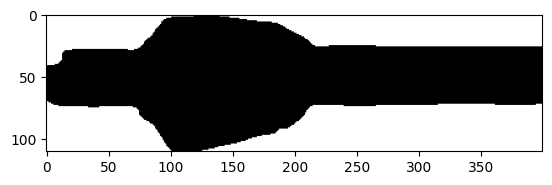

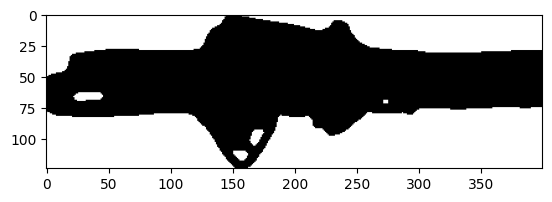

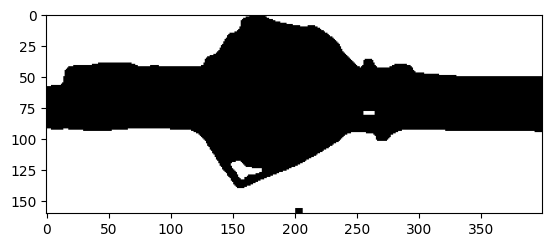

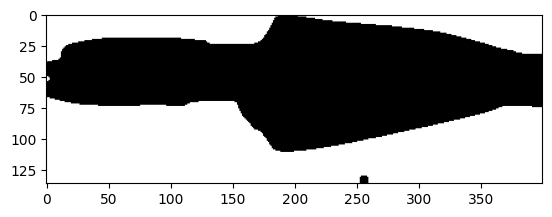

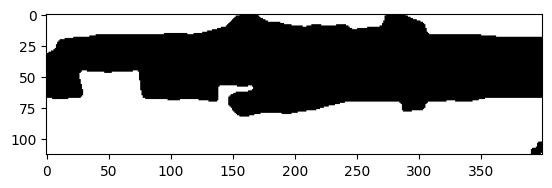

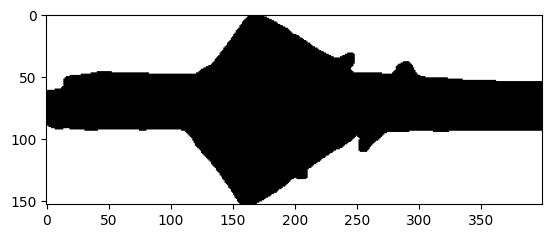

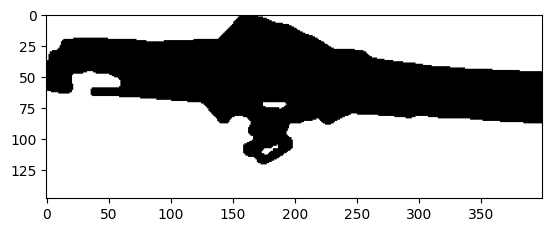

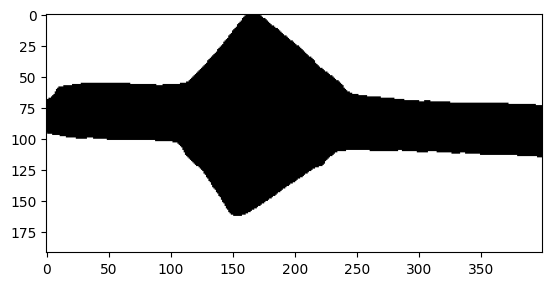

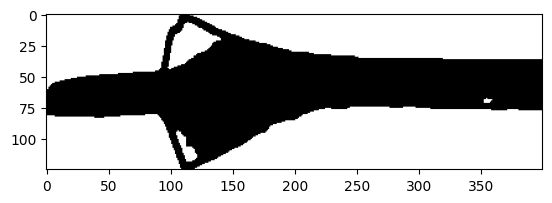

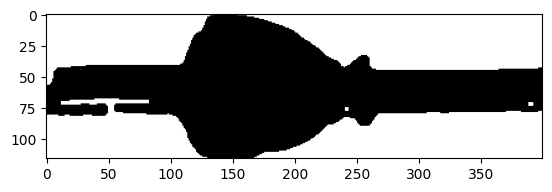

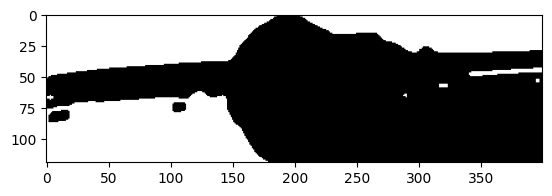

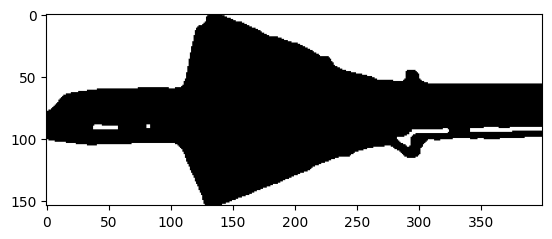

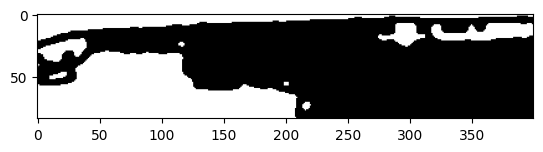

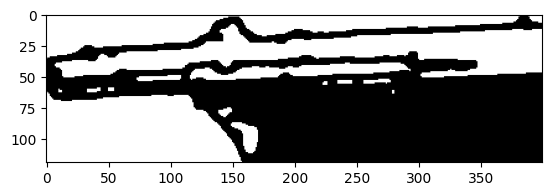

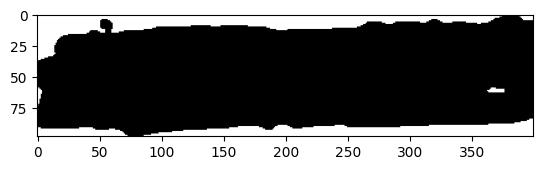

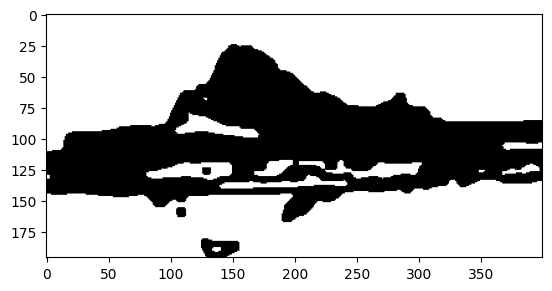

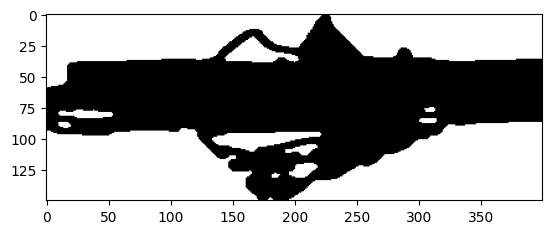

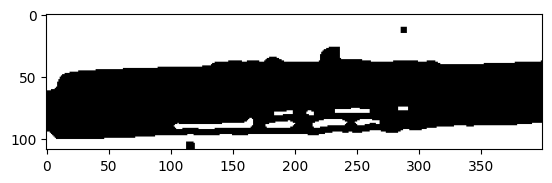

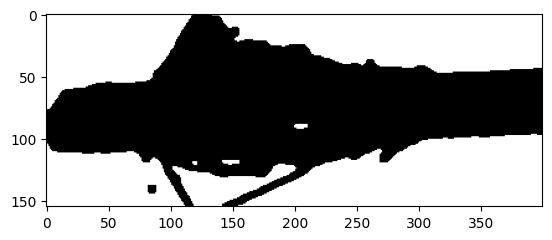

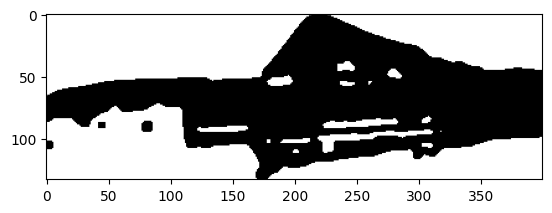

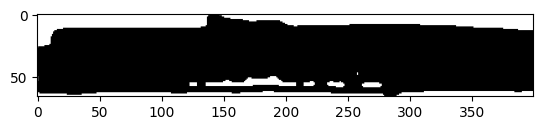

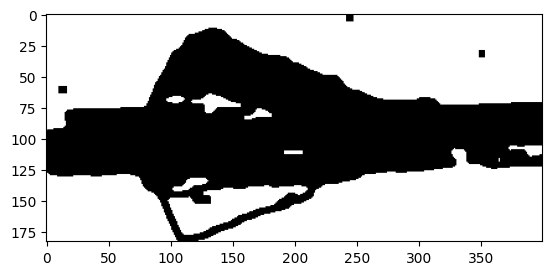

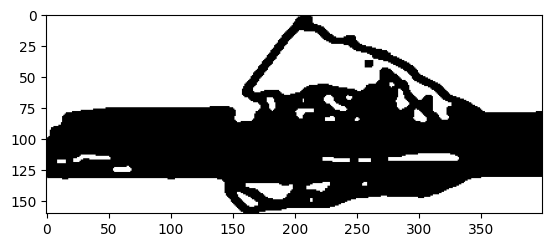

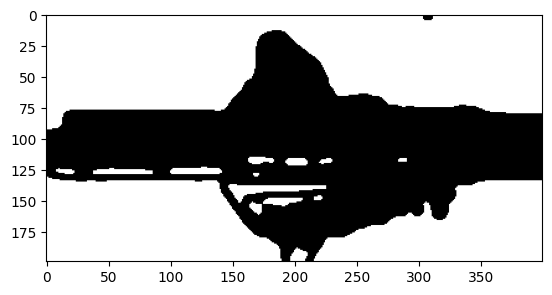

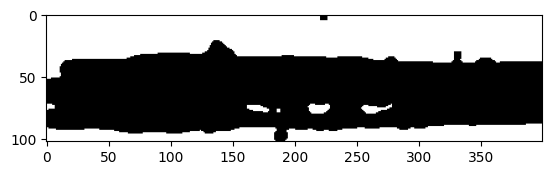

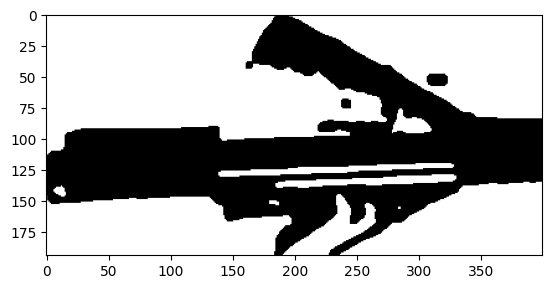

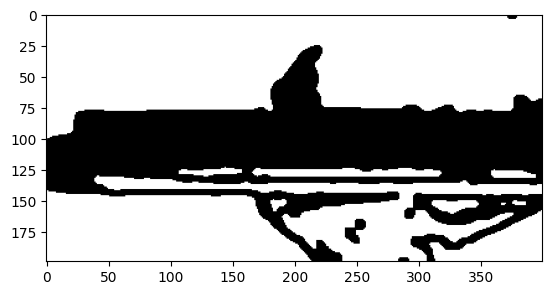

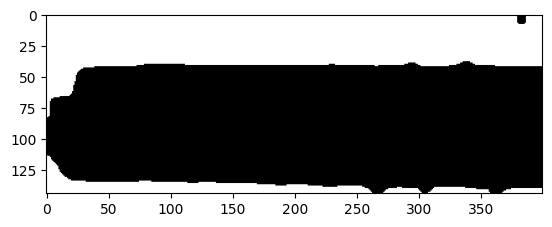

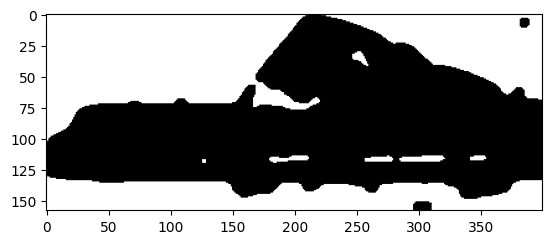

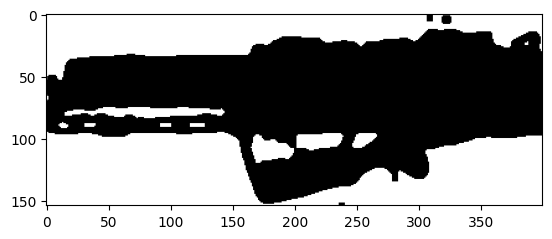

In [19]:
# flood fill
i = 0
floodList = []
suma = []
for image in edgeList:
    im_floodfill = image.copy()
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    #print(h, w)
    seedH = int((h+1)/2)
    cv2.floodFill(im_floodfill, mask, (350, seedH-2), 0)
    cv2.floodFill(im_floodfill, mask, (200, seedH+5), 0)
    cv2.floodFill(im_floodfill, mask, (250, seedH-10), 0)
    cv2.floodFill(im_floodfill, mask, (170, seedH+10), 0)
    cv2.floodFill(im_floodfill, mask, (390, seedH+5), 0)
    floodList.append(im_floodfill)
    plt.imshow(im_floodfill, cmap = plt.cm.gray)
    plt.show()
        
    suma.append(0)
    for j in range(0,h):
        for jj in range(0,w):
            if floodList[i][j][jj] == 0:
                suma[i] = suma[i] + 1
    i = i+1

In [20]:
print(suma)
print(hList)

[26316, 24987, 24766, 24622, 26370, 27015, 22308, 26219, 21442, 25826, 19904, 22004, 28155, 27560, 21579, 24670, 32266, 26512, 28630, 21366, 30886, 24554, 20975, 30829, 28246, 32930, 22628, 29113, 29387, 37827, 34737, 33318]
[134, 130, 110, 124, 160, 136, 113, 153, 148, 192, 125, 116, 119, 154, 84, 119, 98, 196, 150, 109, 155, 133, 66, 183, 160, 199, 102, 194, 199, 144, 158, 154]


In [235]:
##### PERCEPTRON
vectores = []
y = []
features = 2
#x, y = make_blobs(n_samples=N, n_features=features, centers=2, cluster_std=2, random_state=2)
for i in range(len(hNo)):
    vectores.append([1, hNo[i], sumNo[i]])
    y.append(0)
for i in range(len(hSi)):
    vectores.append([1, hSi[i], sumSi[i]])
    y.append(1)
N = len(vectores)
print(vectores, y)
xext = vectores
k = 1000
w = np.random.rand(features+1)
print("Pesos iniciales", w)
message = "Mensaje"
yResult = []
lrate = 0.2
for iteration in range(k):
    errorCheck = False
    yTemp = []
    for i in range(N):
        net = np.dot(xext[i], w)
        if (net >= 0):
            yTemp.append(1)
        else:
            yTemp.append(0)
        if (iteration == k-1):
            print(y[i], yTemp[i])
        error = y[i] - yTemp[i]
        if(error != 0):
            errorCheck = True
            w[0] = w[0] + error * xext[i][0] * lrate
            w[1] = w[1] + error * xext[i][1] * lrate
            w[2] = w[2] + error * xext[i][2] * lrate
        yResult = np.asarray(yTemp)
    if (not errorCheck):
        print("Todos los errores son cero")
        print("Última iteración: ", iteration)
        break
    if (iteration == k-1):
        print("Límite de iteraciones alcanzado")
        break

print("Pesos resultantes: ", w)

[[1, 67, 15058], [1, 123, 19003], [1, 111, 18882], [1, 95, 22565], [1, 53, 15047], [1, 103, 17246], [1, 64, 13803], [1, 122, 19822], [1, 106, 23415], [1, 83, 14849], [1, 92, 16941], [1, 91, 17189], [1, 56, 16742], [1, 64, 15451], [1, 68, 19728], [1, 125, 25245], [1, 115, 22018], [1, 151, 27349], [1, 150, 25948], [1, 139, 29440], [1, 155, 27939], [1, 115, 23982], [1, 160, 23135], [1, 143, 27319], [1, 137, 23831]] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Pesos iniciales [0.63471384 0.38611893 0.88719446]
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
Límite de iteraciones alcanzado
Pesos resultantes:  [ -106.36528616 -1560.61388107  4079.88719446]
